### Este notebook lo utilizamos para comprender como agregar una imagen con opacidad a otra imagen. En verdad no utilizamos este notebook, es más bien didáctico y nos sirve para crear la función agregar máscara que está en func_add_mask-py

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

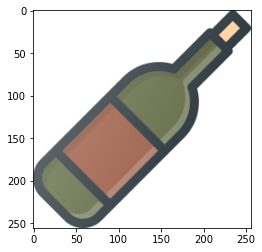

In [5]:
cerpng = imageio.imread('../FiltersForSelfies/Keypoints/beer.png')
cerjpg = imageio.imread('../FiltersForSelfies/Keypoints/beer1.jpg')
vinito = imageio.imread('../FiltersForSelfies/OpenCVFilter/vinito.png')
plt.imshow(vinito)

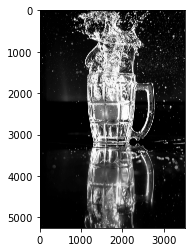

In [19]:
plt.imshow(cerjpg[:, :, 0], cmap='gray')

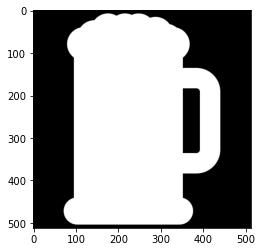

In [26]:
plt.imshow(cerpng[:,:,3], cmap='gray') # en el canal 3 esta guardada la transparencia (la mascara), mientras que los canales del 0 al 2 son los colores rgb

In [6]:
cerpng.shape, cerjpg.shape, vinito.shape


((512, 512, 4), (5254, 3503, 3), (256, 256, 4))

In [11]:
#aproximadamente estas son las coordenadas en las que queremos colocar la imagen
x=2000
y=2000
# lo que queremos es poner la máscara de vinito a la voto de la cerveza

# Fondo con la máscara encima pero sobrepuesta.

In [7]:
cerveza_con_mascara = cerjpg.copy()

In [14]:
cerveza_con_mascara[y:y+256, x:x+256, :] = vinito[:, :, :3]

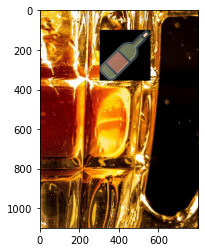

In [20]:
plt.imshow(cerveza_con_mascara[1900:3000, 1700:2500,:])

En realidad lo que tenemos que hacer es limpiar, queremos sobre poner pixel a pixel con un nivel de opacidad.
## Fondo con la imagen sobrepuesta con opacidad 


In [53]:
cerveza_con_mascara2 = cerjpg.copy()

In [54]:
opacidad_stack=np.stack([opacidad, opacidad, opacidad], axis=-1)

In [55]:
#normalizamos la opacidad
opacidad=vinito[:,:,3]/255
im3ch=np.zeros((vinito.shape[0], vinito.shape[1], 3)) #imagen 3 canales
im3ch[:,:,0]=vinito[:,:,0]*opacidad
im3ch[:,:,1]=vinito[:,:,1]*opacidad
im3ch[:,:,2]=vinito[:,:,2]*opacidad

cerveza_con_mascara2[y:y+256, x:x+256, :]= (1-opacidad_stack)*cerveza_con_mascara2[y:y+256, x:x+256, :]+im3ch


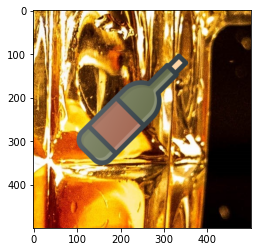

In [56]:
plt.imshow(cerveza_con_mascara2[1900:2400, 1900:2400,:])

In [57]:
#Quedó genial! Entonces copio el codigo que quita el fondo y creo una funciónque quite el fondo